In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import Image

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Reshape images to 1D arrays
x_train = x_train.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)
# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 279s 2us/step


In [7]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(512, activation='relu', input_shape=(3072,)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

C:\Users\91623\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(x_train, y_train,
batch_size=128,
epochs=20,
validation_split=0.2,
verbose=1)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.1912 - loss: 2.1860 - val_accuracy: 0.3152 - val_loss: 1.8932
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.3087 - loss: 1.9026 - val_accuracy: 0.3579 - val_loss: 1.7752
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.3304 - loss: 1.8400 - val_accuracy: 0.3700 - val_loss: 1.7656
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.3546 - loss: 1.7938 - val_accuracy: 0.3920 - val_loss: 1.7212
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.3648 - loss: 1.7512 - val_accuracy: 0.3849 - val_loss: 1.7161
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.3693 - loss: 1.7583 - val_accuracy: 0.4035 - val_loss: 1.6715
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.3827 - loss: 1.7089 - val_accuracy: 0.4045 - val_loss: 1.6791
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.3867 - loss: 1.7099 - val_acc

Test Accuracy: 0.46


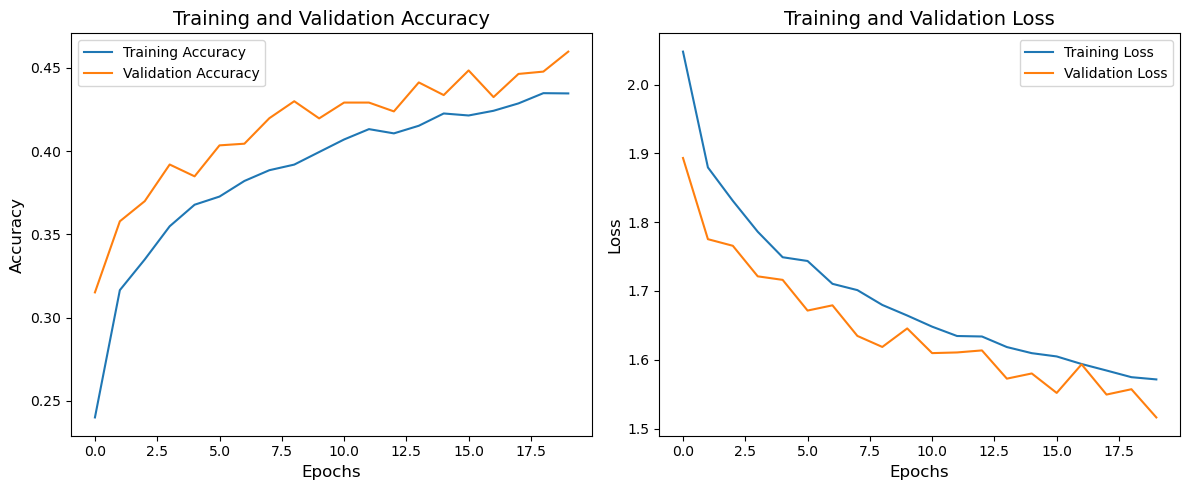

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)


print(f"Test Accuracy: {test_accuracy:.2f}")


import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
y_pred=model.predict(x_test)
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


              precision    recall  f1-score   support

           0       0.55      0.49      0.52      1000
           1       0.63      0.53      0.58      1000
           2       0.36      0.25      0.30      1000
           3       0.33      0.32      0.33      1000
           4       0.38      0.31      0.35      1000
           5       0.48      0.25      0.33      1000
           6       0.42      0.62      0.50      1000
           7       0.45      0.61      0.52      1000
           8       0.54      0.66      0.59      1000
           9       0.48      0.57      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.45     10000
weighted avg       0.46      0.46      0.45     10000



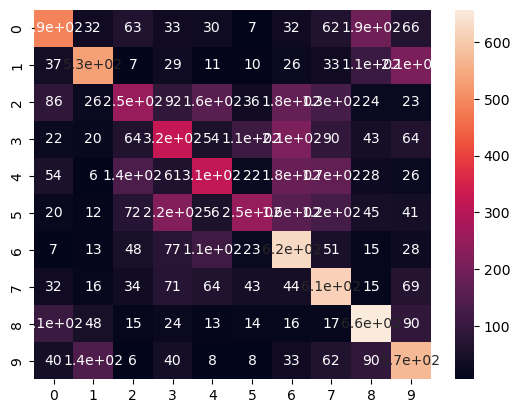

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))